<a href="https://colab.research.google.com/github/Siddarth-S-Nair/Python-Project/blob/main/UBER_ANALYSIS_USING_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UBER TRIP ANALYSIS USING ML**

# **Importing Necessary Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# **Data Cleaning**

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,0
CATEGORY*,0
START*,0
STOP*,0
MILES*,0
PURPOSE*,0


In [ ]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'],format = '%m/%d/%Y %H:%M')

In [ ]:
data.dtypes


,0
START_DATE*,datetime64[ns]
END_DATE*,datetime64[ns]
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [ ]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in data['START_DATE*']:
  hour.append(i.hour)
  day.append(i.day)
  dayofweek.append(i.dayofweek)
  month.append(i.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAYOFWEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [ ]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAYOFWEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [ ]:
daily_trips = data['DAY'].value_counts().sort_index().reset_index()
daily_trips.columns = ['DAY', 'TRIPS']

monthly_trips = data['MONTH'].value_counts().sort_index().reset_index()
monthly_trips.columns = ['MONTH', 'TRIPS']

weekday_trips = data['WEEKDAY'].value_counts().sort_index().reset_index()
weekday_trips.columns = ['WEEKDAY', 'TRIPS']

hourly_trips = data['HOUR'].value_counts().sort_index().reset_index()
hourly_trips.columns = ['HOUR', 'TRIPS']


# **DAY HAVING MOST UBER TRIPS**

In [ ]:
day_counts = data.groupby('DAY').size().reset_index(name='No. of Trips')

In [ ]:
le = LabelEncoder()
day_counts['day_encoded'] = le.fit_transform(day_counts['DAY'])

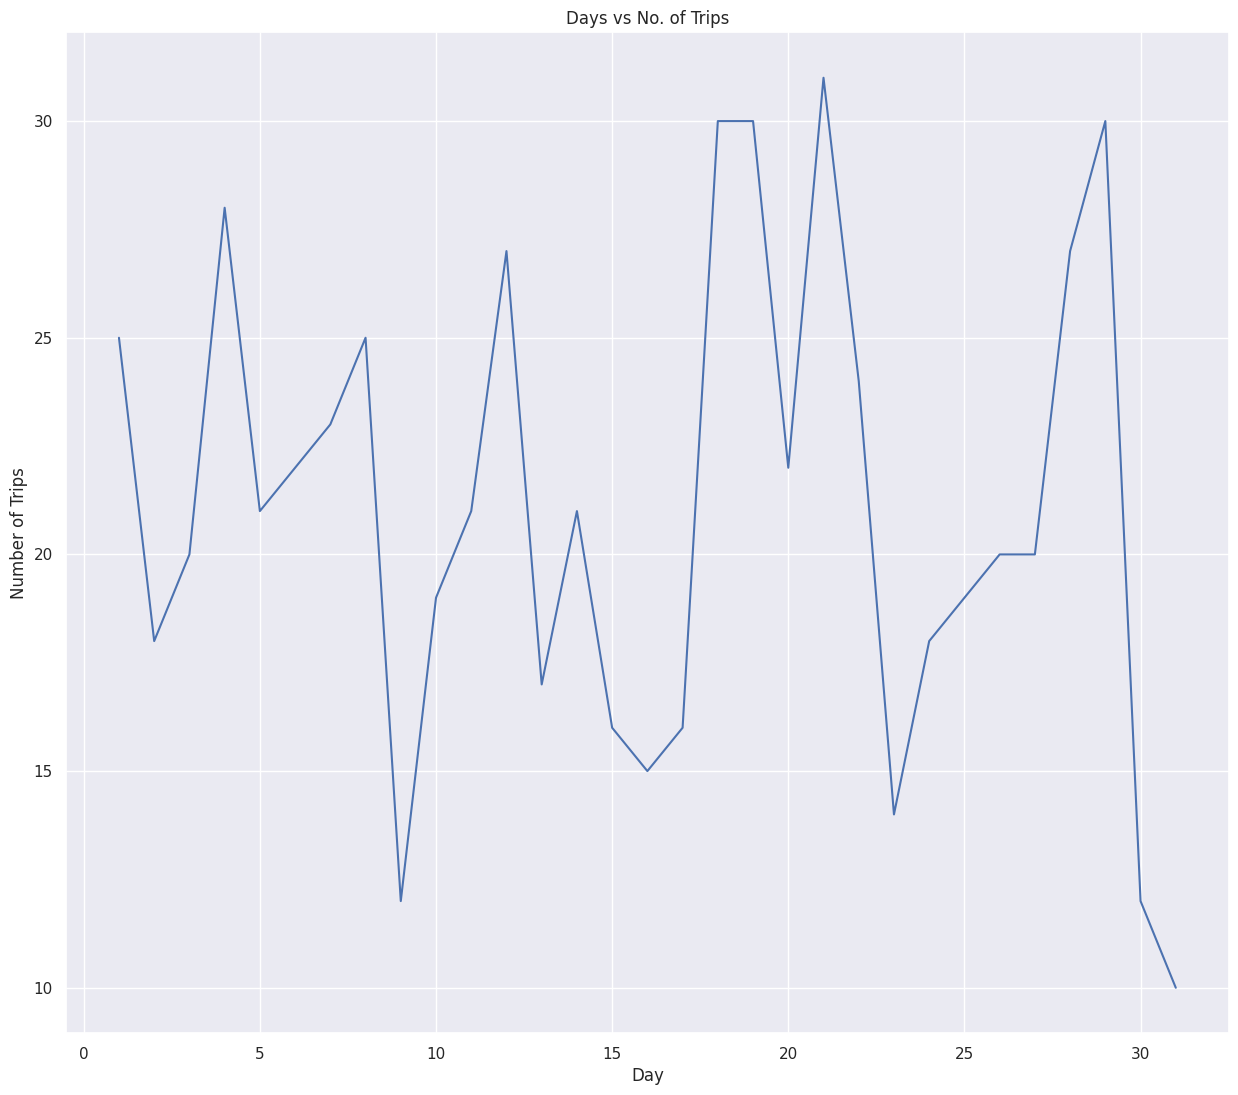

In [ ]:
X = day_counts[['day_encoded']]
y = day_counts['No. of Trips']

model = LinearRegression()
model.fit(X, y)

day_counts['predicted_trips'] = model.predict(X)

plt.figure()
plt.plot(day_counts['DAY'], day_counts['No. of Trips'])
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.title('Days vs No. of Trips')
plt.show()

# **ANALYSE THE UBER TRIPS ACCORDING TO HOURS**

In [ ]:
hour_counts = data.groupby('HOUR').size().reset_index(name='No. of Trips')

In [ ]:
le = LabelEncoder()
hour_counts['hour_encoded'] = le.fit_transform(hour_counts['HOUR'])

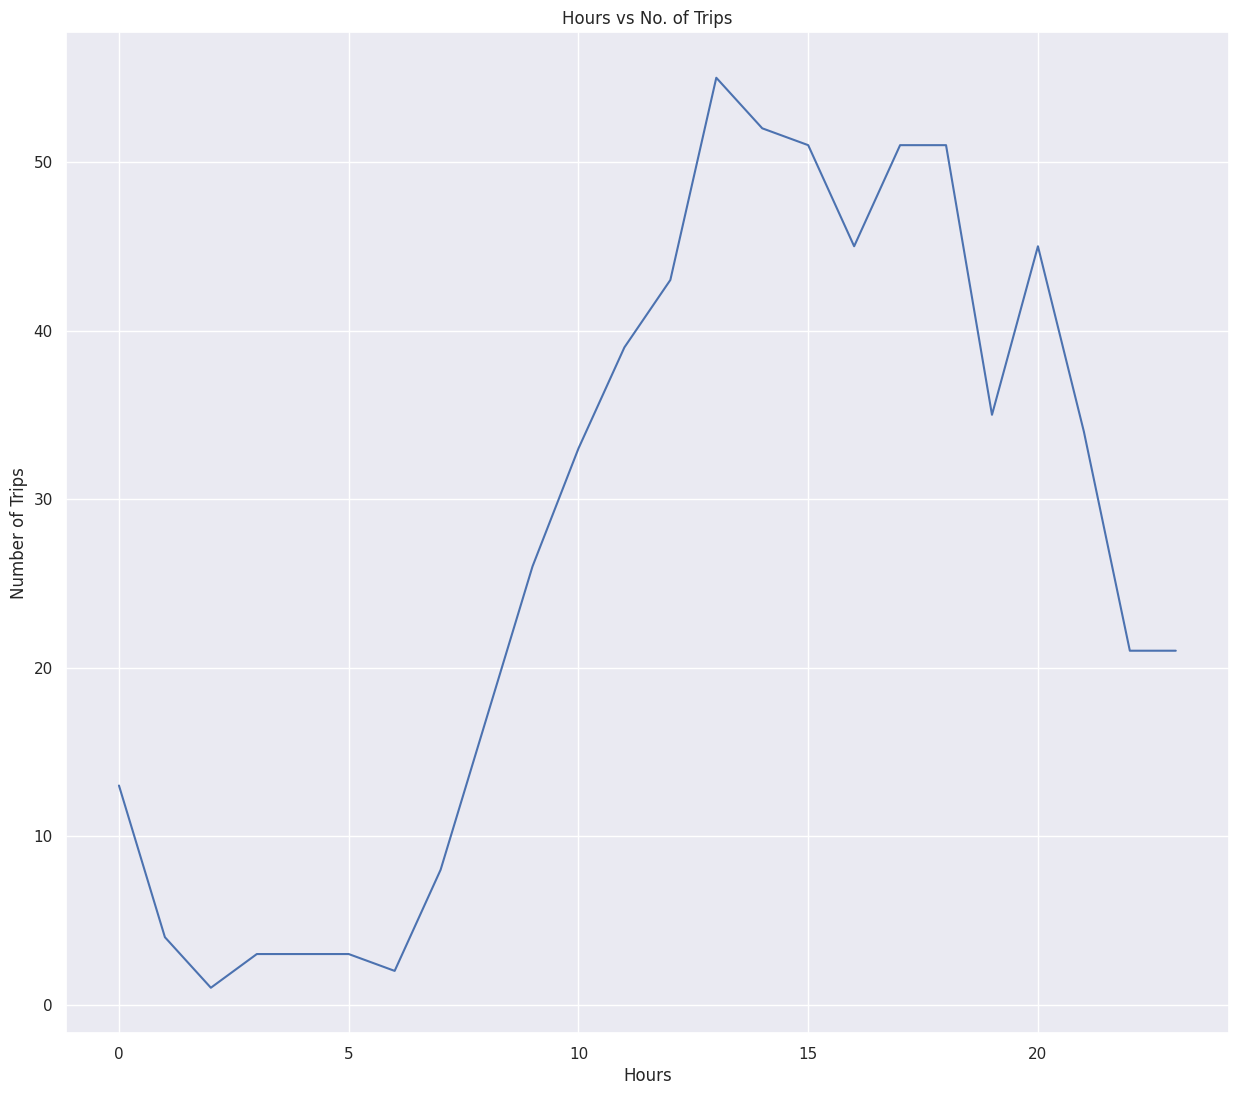

In [ ]:
X = hour_counts[['hour_encoded']]
y = hour_counts['No. of Trips']

model = LinearRegression()
model.fit(X, y)

hour_counts['predicted_trips'] = model.predict(X)

plt.figure()
plt.plot(hour_counts['HOUR'], hour_counts['No. of Trips'])
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.title('Hours vs No. of Trips')
plt.show()

# **WHICH MONTH HAVING MOST UBER TRIPS**

In [ ]:
month_counts = data.groupby('MONTH').size().reset_index(name='No. of Trips')

le = LabelEncoder()
month_counts['month_encoded'] = le.fit_transform(month_counts['MONTH'])

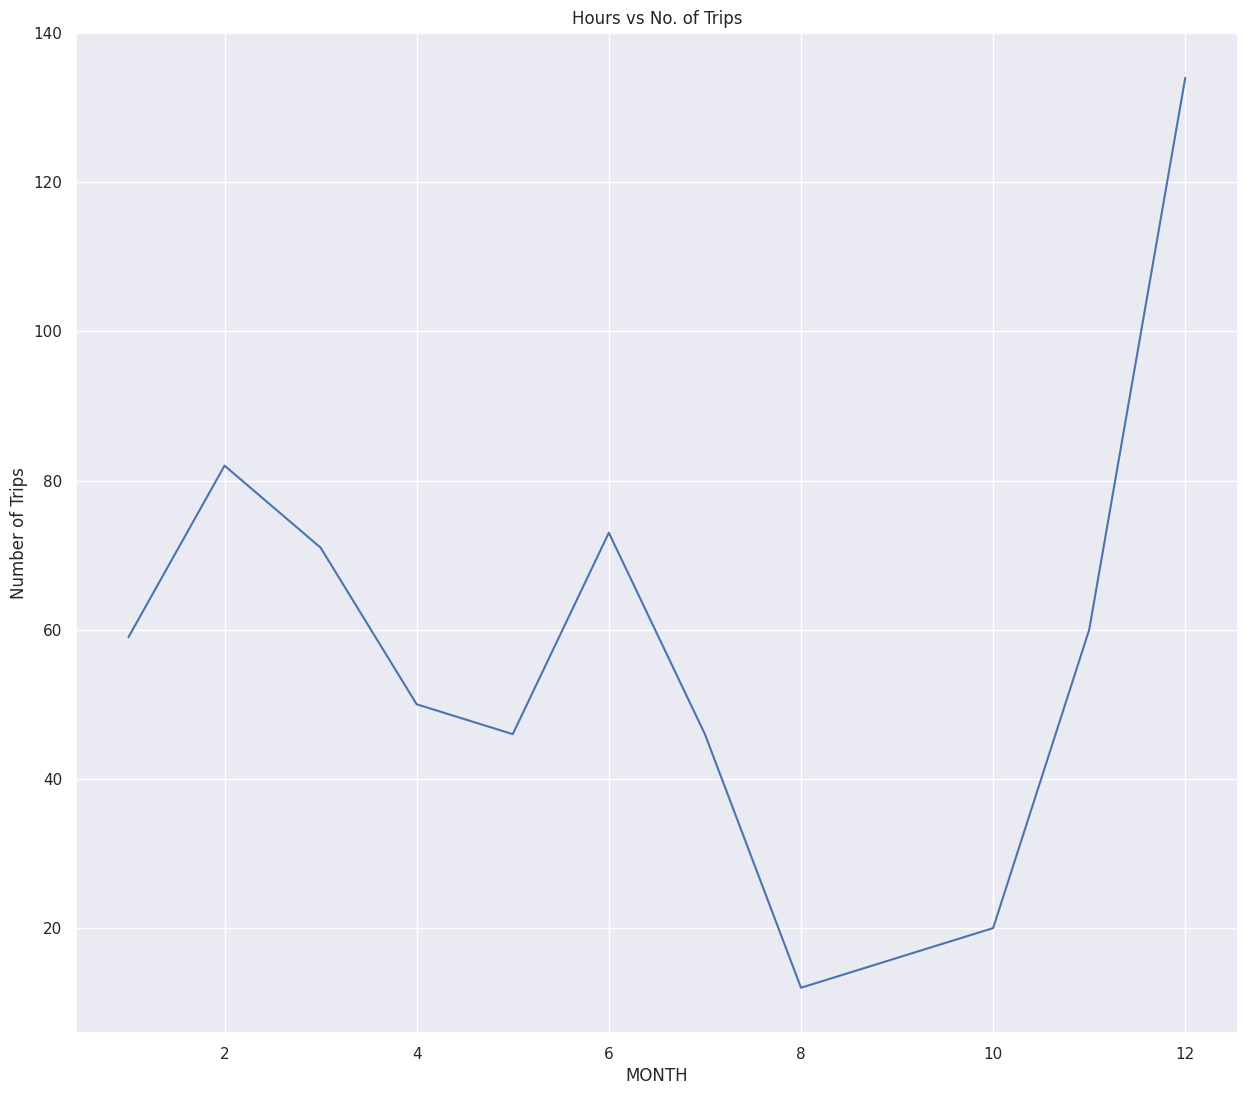

In [ ]:
X = month_counts[['month_encoded']]
y = month_counts['No. of Trips']

model = LinearRegression()
model.fit(X, y)

month_counts['predicted_trips'] = model.predict(X)

plt.figure()
plt.plot(month_counts['MONTH'], month_counts['No. of Trips'])
plt.xlabel('MONTH')
plt.ylabel('Number of Trips')
plt.title('Hours vs No. of Trips')
plt.show()

# **Which Day Has The Highest Number Of Trips**

In [ ]:
weekday_counts = data.groupby('WEEKDAY').size().reset_index(name='No. of Trips')

le = LabelEncoder()
weekday_counts['weekday_encoded'] = le.fit_transform(weekday_counts['WEEKDAY'])

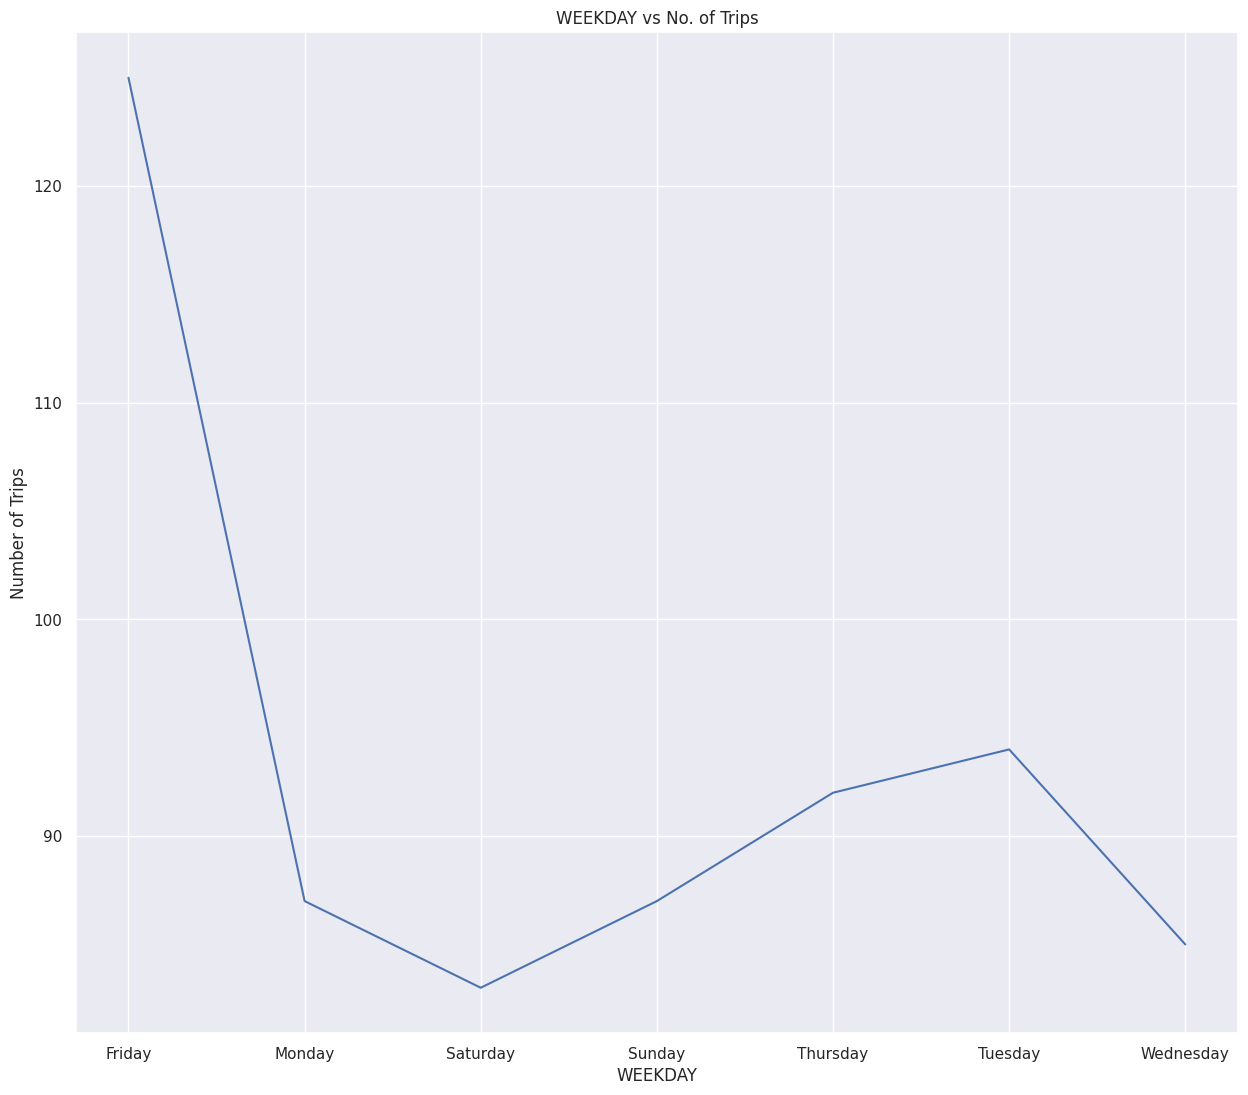

In [ ]:
X = weekday_counts[['weekday_encoded']]
y = weekday_counts['No. of Trips']

model = LinearRegression()
model.fit(X, y)

weekday_counts['predicted_trips'] = model.predict(X)

plt.figure()
plt.plot(weekday_counts['WEEKDAY'], weekday_counts['No. of Trips'])
plt.xlabel('WEEKDAY')
plt.ylabel('Number of Trips')
plt.title('WEEKDAY vs No. of Trips')
plt.show()

# **The Starting Points Of Trips . Where Do People Start Boarding Their Trip From Most.**

In [ ]:
start_counts = data.groupby('START*').size().reset_index(name='No. of Trips')

le = LabelEncoder()
start_counts['start_encoded'] = le.fit_transform(start_counts['START*'])

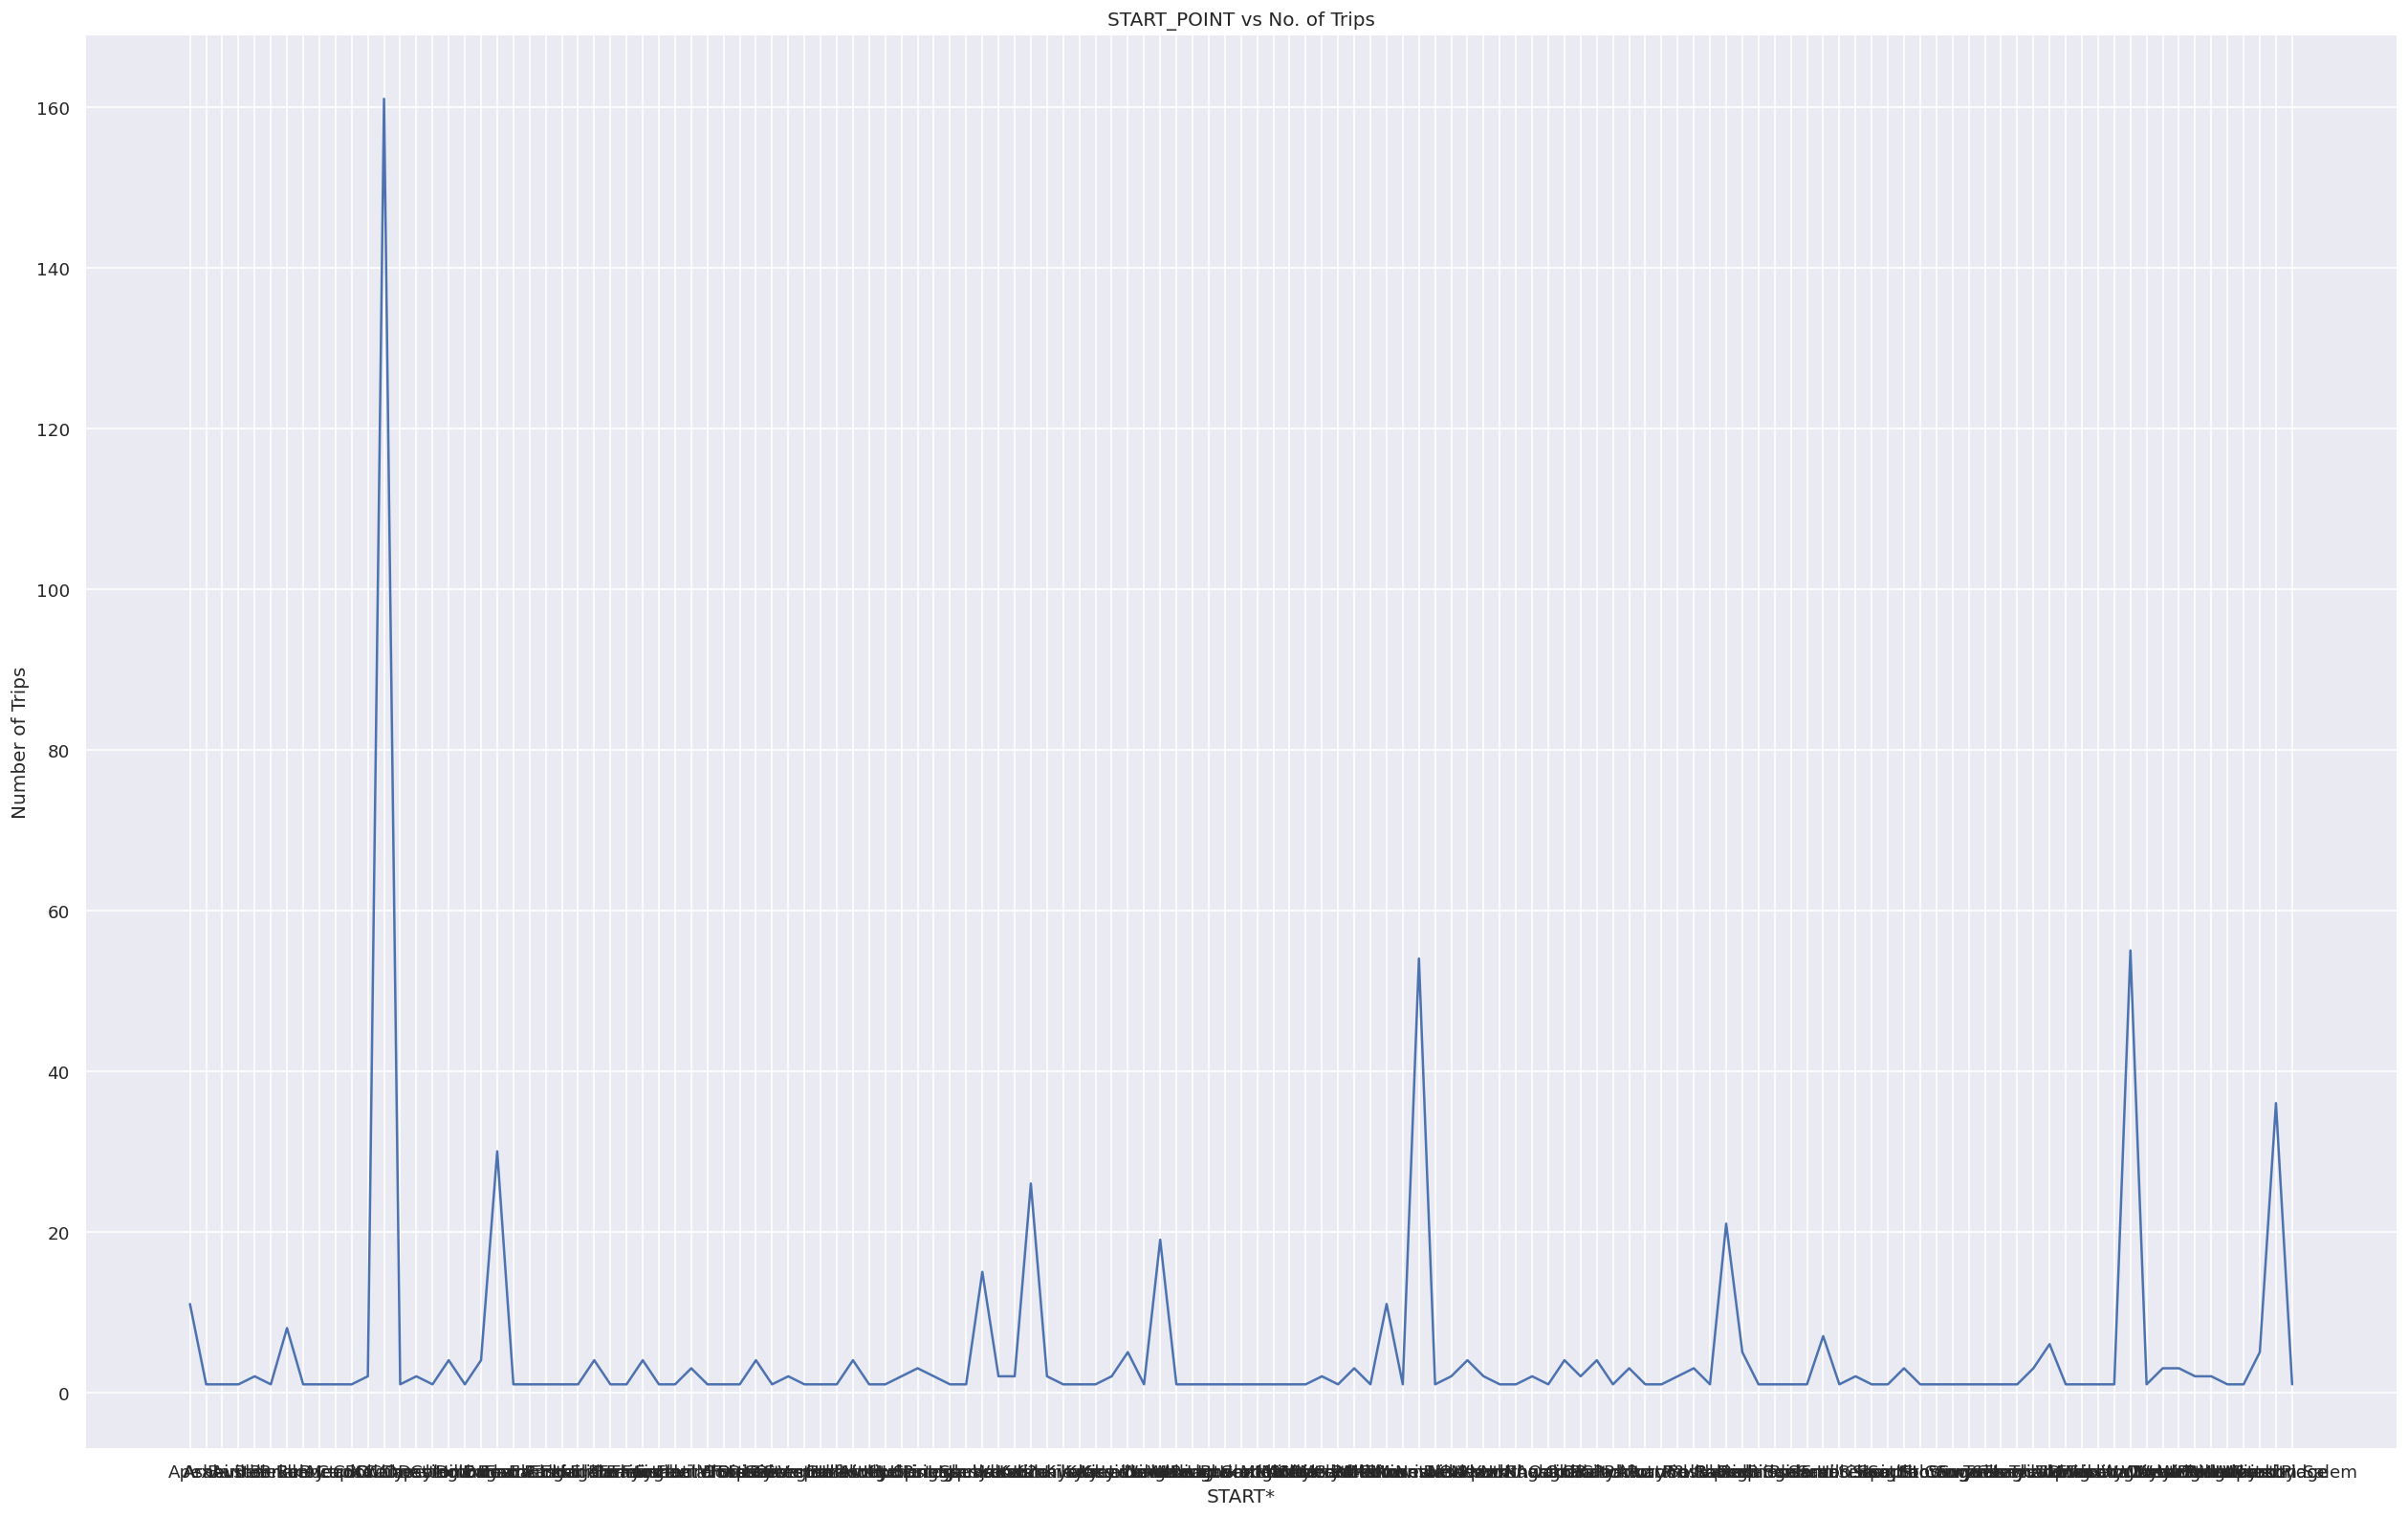

In [ ]:
X = start_counts[['start_encoded']]
y = start_counts['No. of Trips']

model = LinearRegression()
model.fit(X, y)

start_counts['predicted_trips'] = model.predict(X)

plt.figure(figsize=(26,16) , dpi=120)
plt.plot(start_counts['START*'], start_counts['No. of Trips'])
plt.xlabel('START*')
plt.ylabel('Number of Trips')
plt.title('START_POINT vs No. of Trips')
plt.show()